# Transformacion de ondas
## > Omar Flores Sanchez
## > Valeria Jahzeel Castañon Hernandez

In [48]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import math

In [49]:
ancho = 245
alto = 205

In [50]:
def convolucion(Sn, S):
    ancho, alto = S.shape
    mat = np.zeros_like(S) # matriz de la imagen
    
    for x in range(1, ancho-1):
        for y in range(1, alto-1):
            for x2 in range(3):
                for y2 in range(3):
                    mat[x, y] += S[x - 1 + x2, y - 1 + y2] * Sn[x2, y2]
    
    imagen = Image.fromarray(mat)
    plt.imshow(imagen,cmap='gray')
    
    return mat                   


In [51]:
def mapa(a, S, G):
    mat = np.empty((ancho, alto)) # matriz de la imagen
    
    for y in range(alto):
        for x in range(ancho):
            if(x<alto and y<ancho):
                mat[x, y] = abs(x + a * S[x, y] * G[x, y])
    
    imagen = Image.fromarray(mat)
    plt.imshow(imagen, cmap='gray')
    
    return mat

In [52]:
def redimensionar(foto):
    ancho = 245
    alto = 205
    
    nueva = foto.resize((ancho, alto))
    plt.imshow(nueva,cmap='gray')
    
    return nueva

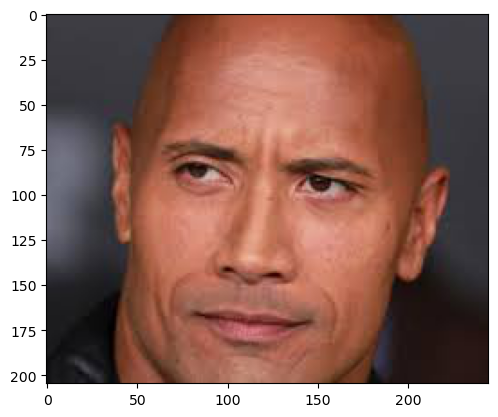

In [53]:
# ---------- TRANSFORMACION DE ONDAS ------------
# mostrar 3 diferentes efectos que se puedean apreciar facilmente al variar los parametros cx,cy,f,p

foto = Image.open("roca.jpg")

#Se redimenciona pa mas facil.
foto = redimensionar(foto)

#print(foto.size)
#print(ancho,alto)

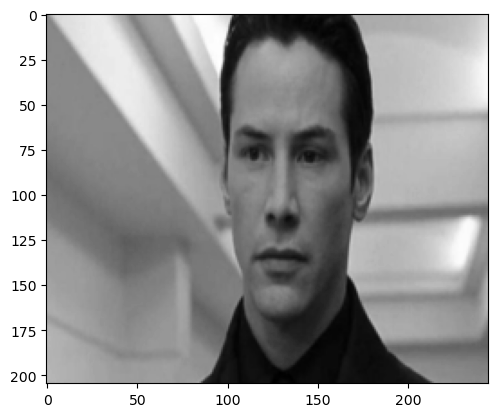

In [54]:
# -------------- superficie deformante --------------
# se abre la imagen
fruta = Image.open("keanu.jpg")

# Convertir la imagen a escala de grises
imagen_gris = fruta.convert("L")

# Guardar la imagen en escala de grises
imagen_gris.save("gris.jpg")

imagen_gris = Image.open("gris.jpg")
imagen_gris = redimensionar(imagen_gris)

S = np.array(imagen_gris)
#print(S.shape)

plt.imshow(imagen_gris,cmap='gray')

In [55]:
# ----------- TRANSFORMACION DE LA IMAGEN -------------

#definirmos Sx y Sy
Sx = np.array([[-1,0,1],
             [-2,0,2],
             [-1,0,1]])

#print(Sx)

Sy = np.array([[-1,-2,-1],
             [0,0,0],
             [1,2,1]])

#print(Sy)

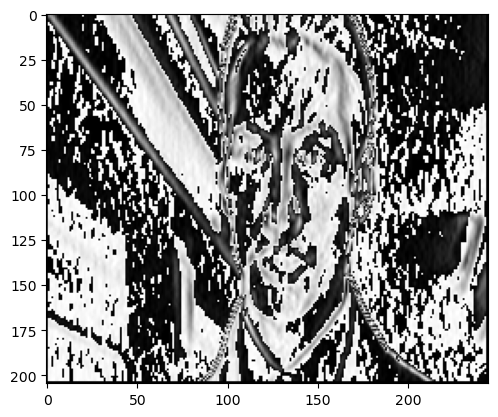

In [56]:
# Clcular Gx = Sx x S
Gx = convolucion(Sx,S)
#print(Gx.shape)
#print(Gx)

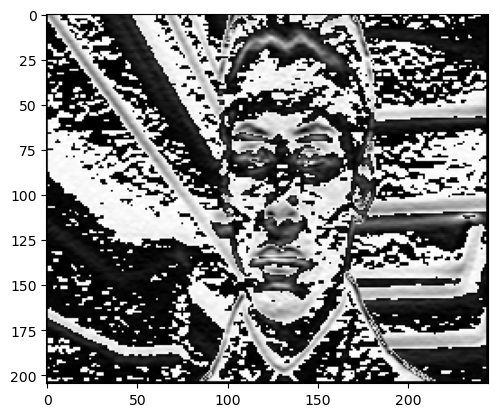

In [57]:
# Calcular Gy = Sy x S
Gy = convolucion(Sy,S)
#print(Gy.shape)
#print(Gy)

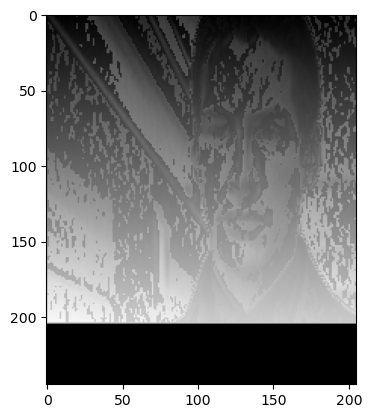

In [58]:
a = 0.001  # grado de la transformacion

MapaX = mapa(a , S, Gx)
#print(MapaX.shape)
#print(MapaX)

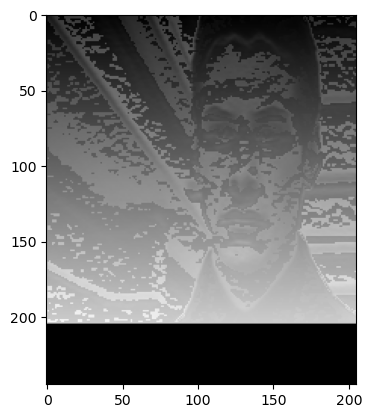

In [59]:
MapaY = mapa(a , S, Gy)
#print(MapaY.shape)
#print(MapaY)

In [61]:
def resultado(imagen, Mx, My):
    foto = np.array(imagen)
    mat = np.empty_like(foto)

    for x in range(ancho):
        for y in range(alto):
            if(Mx[x,y]<=foto.shape[0] and My[x,y]<=foto.shape[1]):
                mat[x, y] = foto[int(Mx[x, y]), int(My[x, y])]
               
    img = Image.fromarray(mat)
    plt.imshow(img)
    
resultado(foto,MapaX,MapaY)

IndexError: index 205 is out of bounds for axis 0 with size 205

foto redimensionada
205 245
foto redimensionada
(205, 245)
(205, 245)


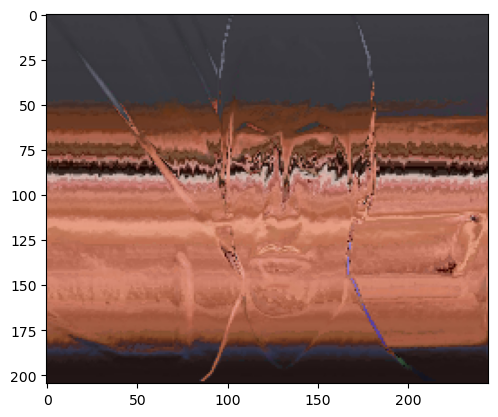

In [62]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import math

def redimensionar(foto):
    ancho = 245
    alto = 205
    nueva = foto.resize((ancho,alto))
    print("foto redimensionada")
    plt.imshow(nueva)
    return nueva
# ---------- TRANSFORMACION DE ONDAS ------------
# mostrar 3 diferentes efectos que se puedean apreciar facilmente al variar los parametros cx,cy,f,p

foto = Image.open("roca.jpg")

#Se redimenciona pa mas facil.
#ancho, alto = foto.size
ancho = 205
alto = 245

foto = redimensionar(foto)
print(ancho,alto)
#plt.imshow(foto)

# -------------- superficie deformante --------------
# se abre la imagen
fruta = Image.open("keanu.jpg")

# Convertir la imagen a escala de grises
imagen_gris = fruta.convert("L")

# Guardar la imagen en escala de grises
imagen_gris.save("gris.jpg")

imagen_gris = Image.open("gris.jpg")
imagen_gris = redimensionar(imagen_gris)

S = np.array(imagen_gris)
#print(S.shape)

plt.imshow(imagen_gris,cmap='gray')

# ----------- TRANSFORMACION DE LA IMAGEN -------------

#definirmos Sx y Sy
Sx = np.array([[-1,0,1],
             [-2,0,2],
             [-1,0,1]])

#print(Sx)

Sy = np.array([[-1,-2,-1],
             [0,0,0],
             [1,2,1]])

# ----------- convolucion --------------
def convolucion(Sn, S):
    mat = np.zeros((ancho, alto)) # matriz de la imagen
    
    for x in range(1, ancho-1):
        for y in range(1, alto-1):
            for x2 in range(3):
                for y2 in range(3):
                    mat[x, y] += S[x+x2-1, y+y2-1] * Sn[x2, y2]
    
    imagen = Image.fromarray(mat)
    plt.imshow(imagen)
    return mat                      


#print(Sy)
# Clcular Gx = Sx x S
Gx = convolucion(Sx,S)
print(Gx.shape)
#print(Gx)
# Calcular Gy = Sy x S
Gy = convolucion(Sy,S)
print(Gy.shape)
#print(Gy)

# ----------- mapa en x e y ------------
def mapa(a,S,G):
    mat = np.empty((ancho,alto)) # matriz de la imagen
    
    for x in range(ancho):
        for y in range(alto):
            mat[x, y] = abs(x + a * S[x, y] * G[x, y])
    
    imagen = Image.fromarray(mat)
    plt.imshow(imagen)
    
    return mat

a = 0.001  # grado de la transformacion

MapaX = mapa(a , S, Gx)
#print(MapaX.shape)
#print(MapaX)
MapaY = mapa(a , S, Gy)
#print(MapaY.shape)
#print(MapaY)

def resultado(imagen, Mx, My):
    foto = np.array(imagen)
    mat = np.empty_like(foto)

    for x in range(ancho):
        for y in range(alto):
            if(Mx[x,y]<=foto.shape[0] and My[x,y]<=foto.shape[1]):
                mat[x, y] = foto[int(Mx[x, y]), int(My[x, y])]
               
    img = Image.fromarray(mat)
    plt.imshow(img)
    
resultado(foto,MapaX,MapaY)